# Théorie de l'information appliquée à la visualisation de données.

## TP - 2 : Data Visualisation

Pour ce TP nous utiliserons la librairies "Sickit-image" utilisé pour le traitement d'images en python.

### Importation des packages

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from math import log

from skimage.measure import shannon_entropy
from skimage import data, io, exposure
from skimage.color import rgb2gray
from scipy.stats import entropy

### Conversion de l'image de base (RGB) en nuances de gris (grayscale)

Pour afficher les matrices qui correspondent à l'image RGB ou en couleur il suffit de faire un print(image) ou print(grayscale)

In [2]:
image = io.imread('images/Capture_ordinal.png')
grayscale = rgb2gray(image)

C:\Users\goble\AppData\Local\Temp/ipykernel_12280/4294343178.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale = rgb2gray(image)


### Affichage des deux images

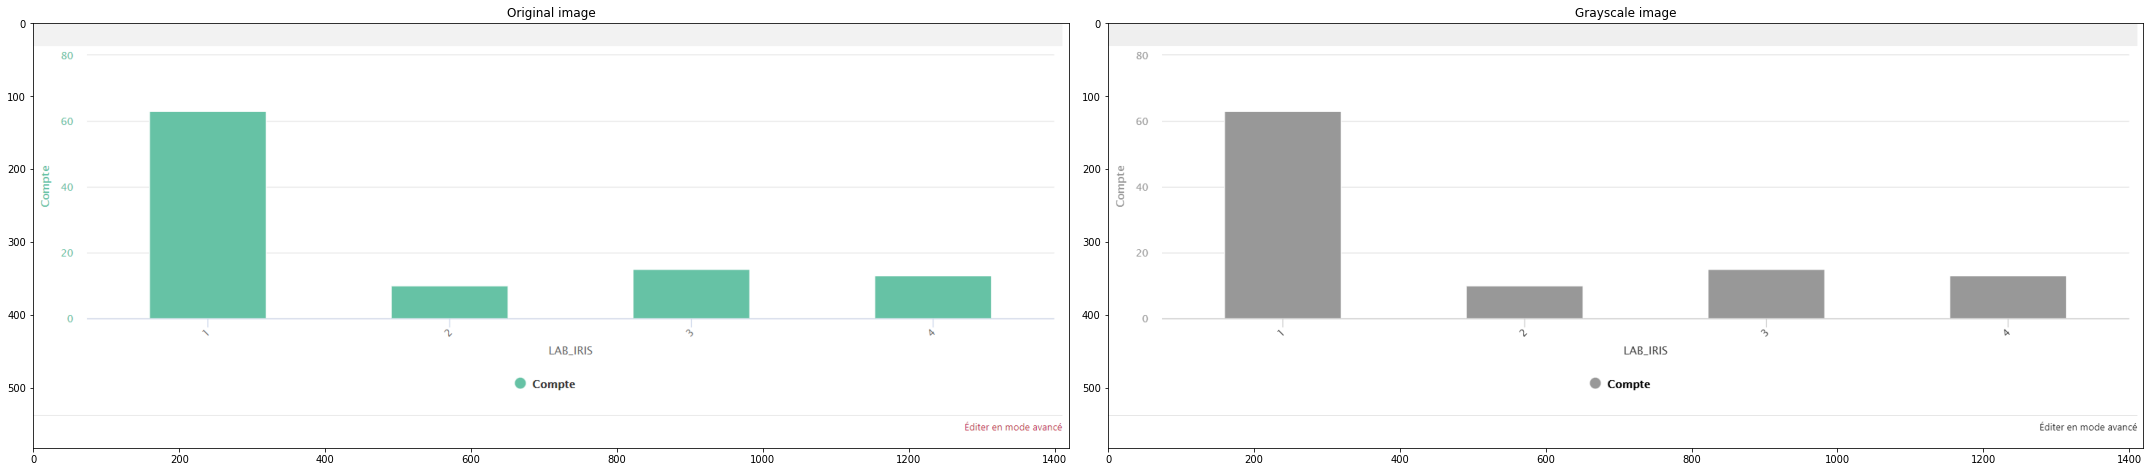

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original image")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale image")

fig.tight_layout()
plt.show()

### Histogramme des nuances de gris

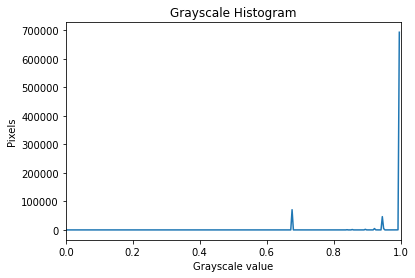

In [13]:
histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0, 1))

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Pixels")
plt.xlim([0.0, 1.0])

plt.plot(bin_edges[0:-1], histogram)
plt.show()

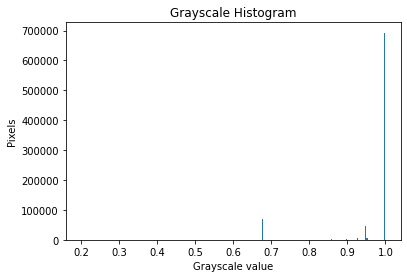

In [34]:
# Autre méthode
ax = plt.hist(grayscale.ravel(), bins = 256)
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Pixels")
plt.show()

On utilisera ici la fonction exposure.histogram de Scikit image.

Cela nous permet d'avoir nos vecteur des effectifs des niveaux de gris.

In [47]:
hist = exposure.histogram(grayscale)

### Calcul de l'entropie associé à l'image 

Nous devons dans un premier temps calculer la fréquence de l'image

In [70]:
shannon_entropy(grayscale)

0.9540661138174239

Nous savons que cette image respece les recommandations de Mackinlay.

Nous avons trouvé une entropie de 0.95, nous allons donc la comparer avec d'autres images.

Pour cela nous allons définir une fonction qui nous renverra un grands nombre d'informations comme l'histogrammes des niveaux de gris et l'entropie mais qui n'a besoin en entrée que d'une image.

Cela facilitera l'interface de l'utilisateur.

### Fonction complète

In [82]:
def entropy_study(RGB_image):
    img = io.imread(RGB_image)
    grayscale = rgb2gray(img)
    
    #Affichage des deux images
    fig, axes = plt.subplots(1, 2, figsize=(50, 25))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Original image")
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale image")
    fig.tight_layout()
    
    #Affichage de l'histogrammes des nuances de gris
    histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0, 1))
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Grayscale value")
    plt.ylabel("Pixels")
    plt.xlim([0.0, 1.0])
    plt.plot(bin_edges[0:-1], histogram)
    
    plt.show()
    
    print(f"Entropie associé à l'image {RGB_image} :",shannon_entropy(grayscale))
    
    if shannon_entropy(grayscale) <= 1.2:
        return "Modèle de Mackinlay respécté."
    else:
        return "Modèle de Mackinlay non-respecté."

C:\Users\goble\AppData\Local\Temp/ipykernel_12280/3910935990.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale = rgb2gray(img)


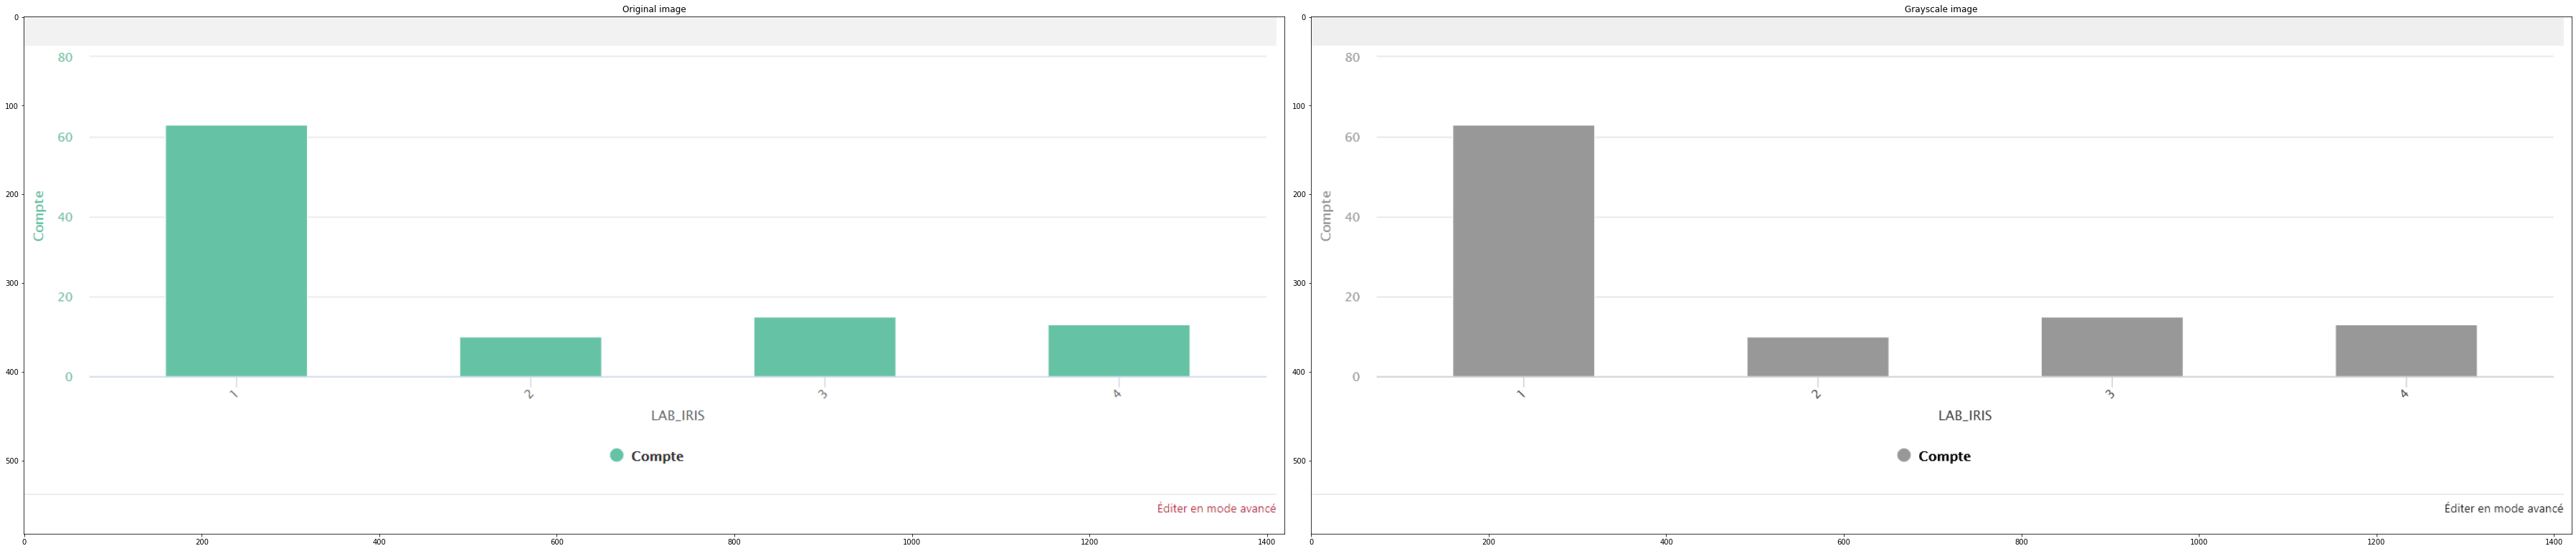

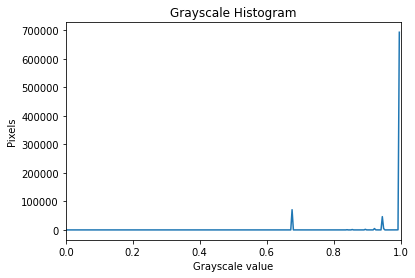

Entropie associé à l'image images/Capture_ordinal.png : 0.9540661138174239


'Modèle de Mackinlay respécté.'

In [83]:
entropy_study('images/Capture_ordinal.png')

C:\Users\goble\AppData\Local\Temp/ipykernel_12280/3910935990.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale = rgb2gray(img)


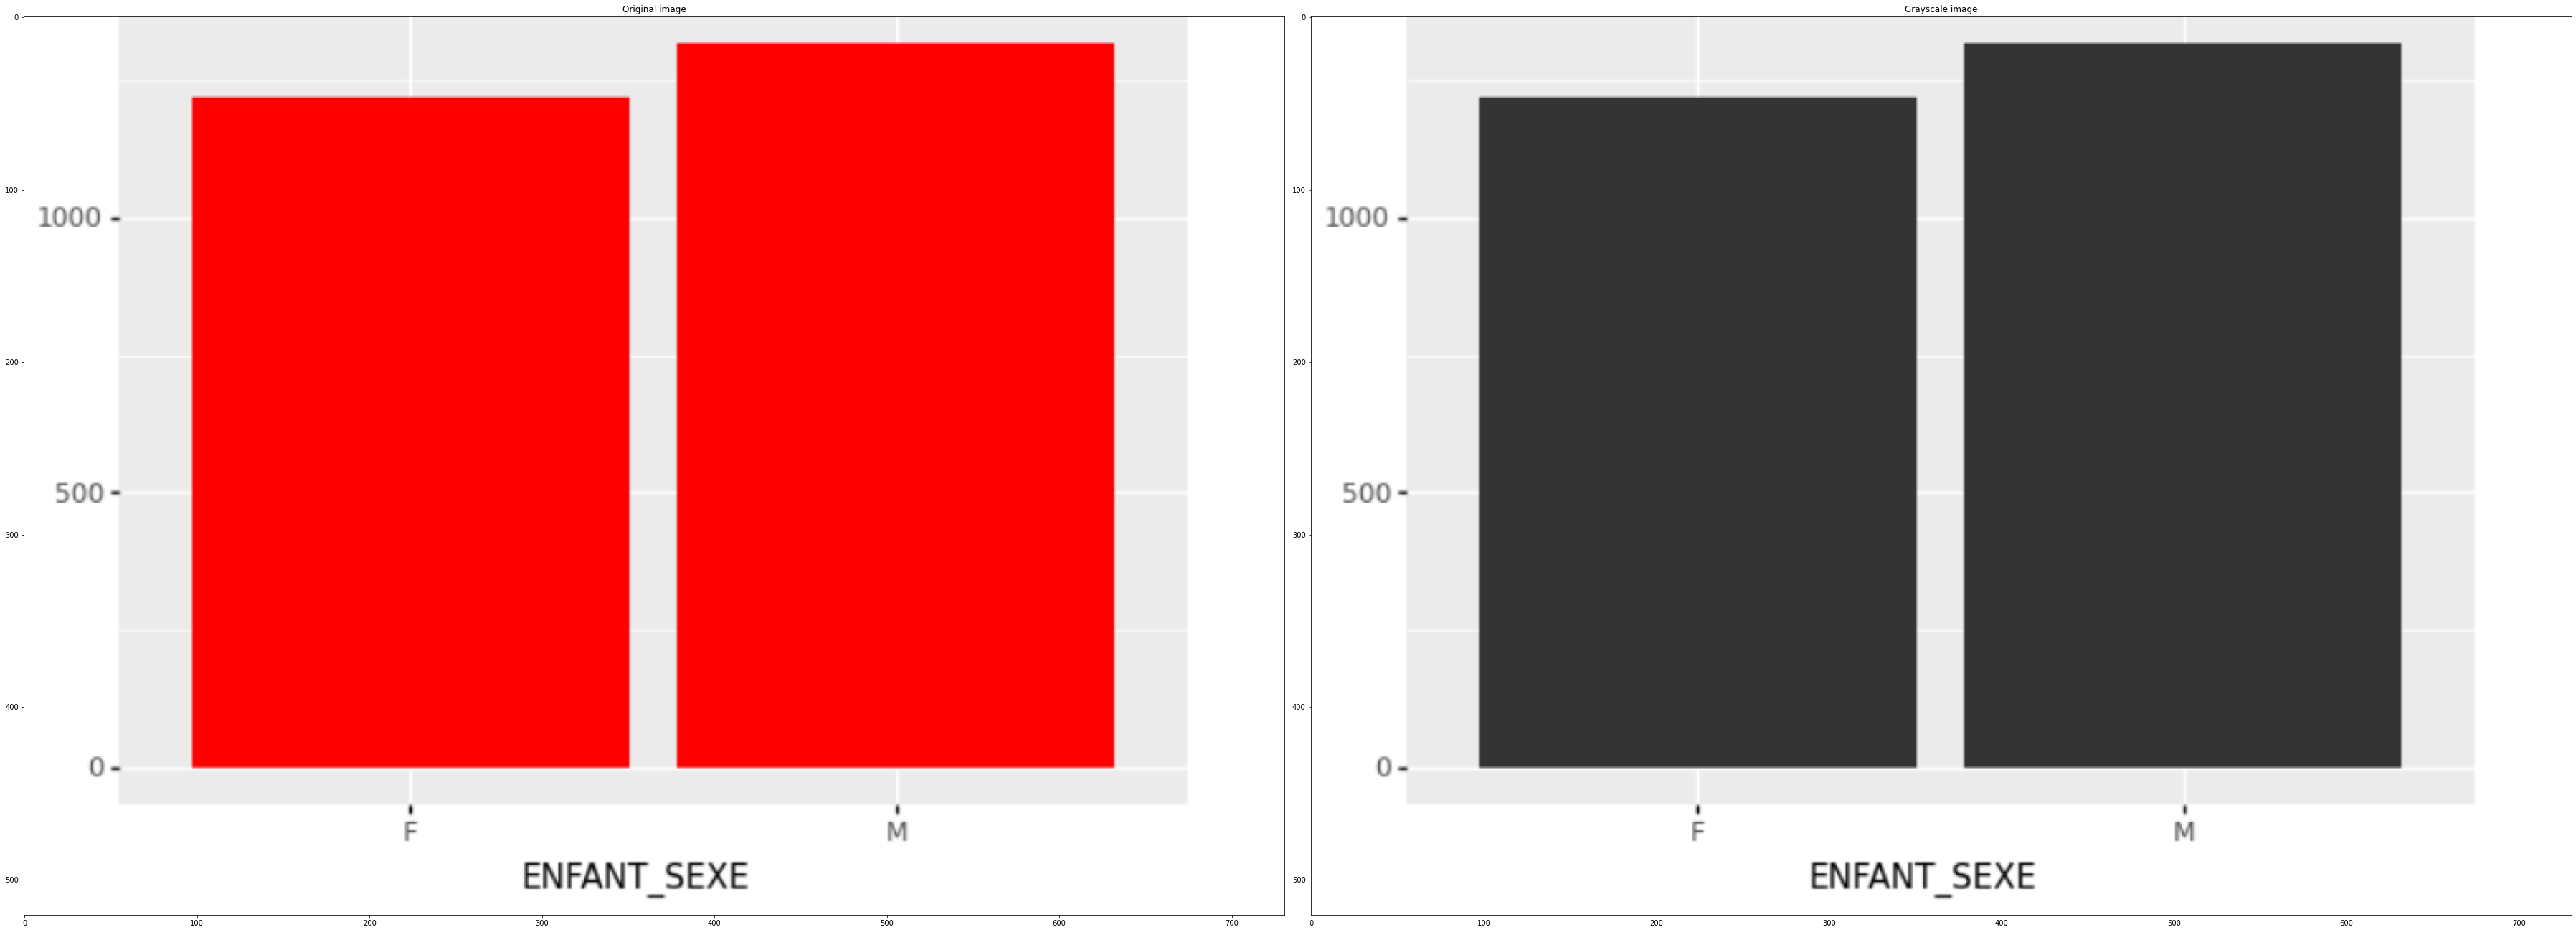

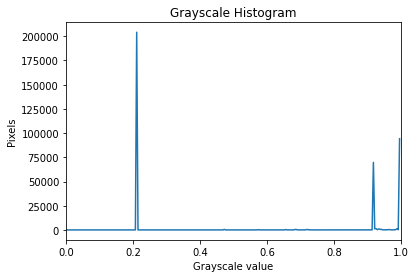

Entropie associé à l'image images/Capture_nominal.png : 1.7729582851995422


C:\Users\goble\AppData\Local\Temp/ipykernel_12280/3910935990.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale = rgb2gray(img)


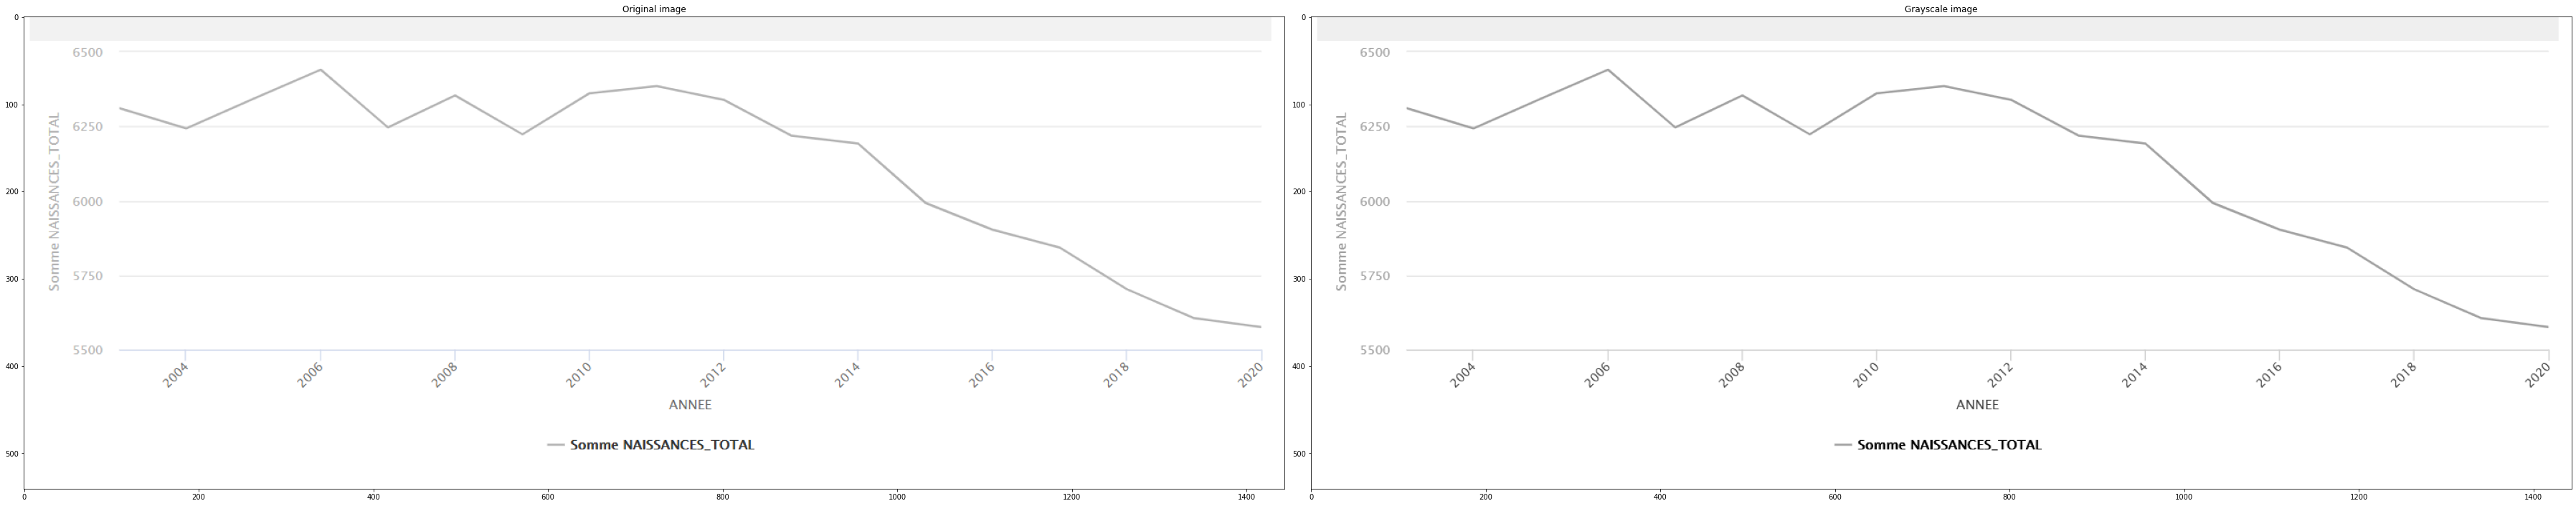

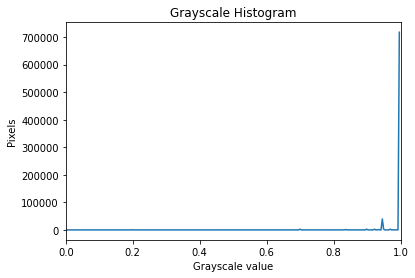

Entropie associé à l'image images/Capture_quantitative.png : 0.6569700276418667


C:\Users\goble\AppData\Local\Temp/ipykernel_12280/3910935990.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale = rgb2gray(img)


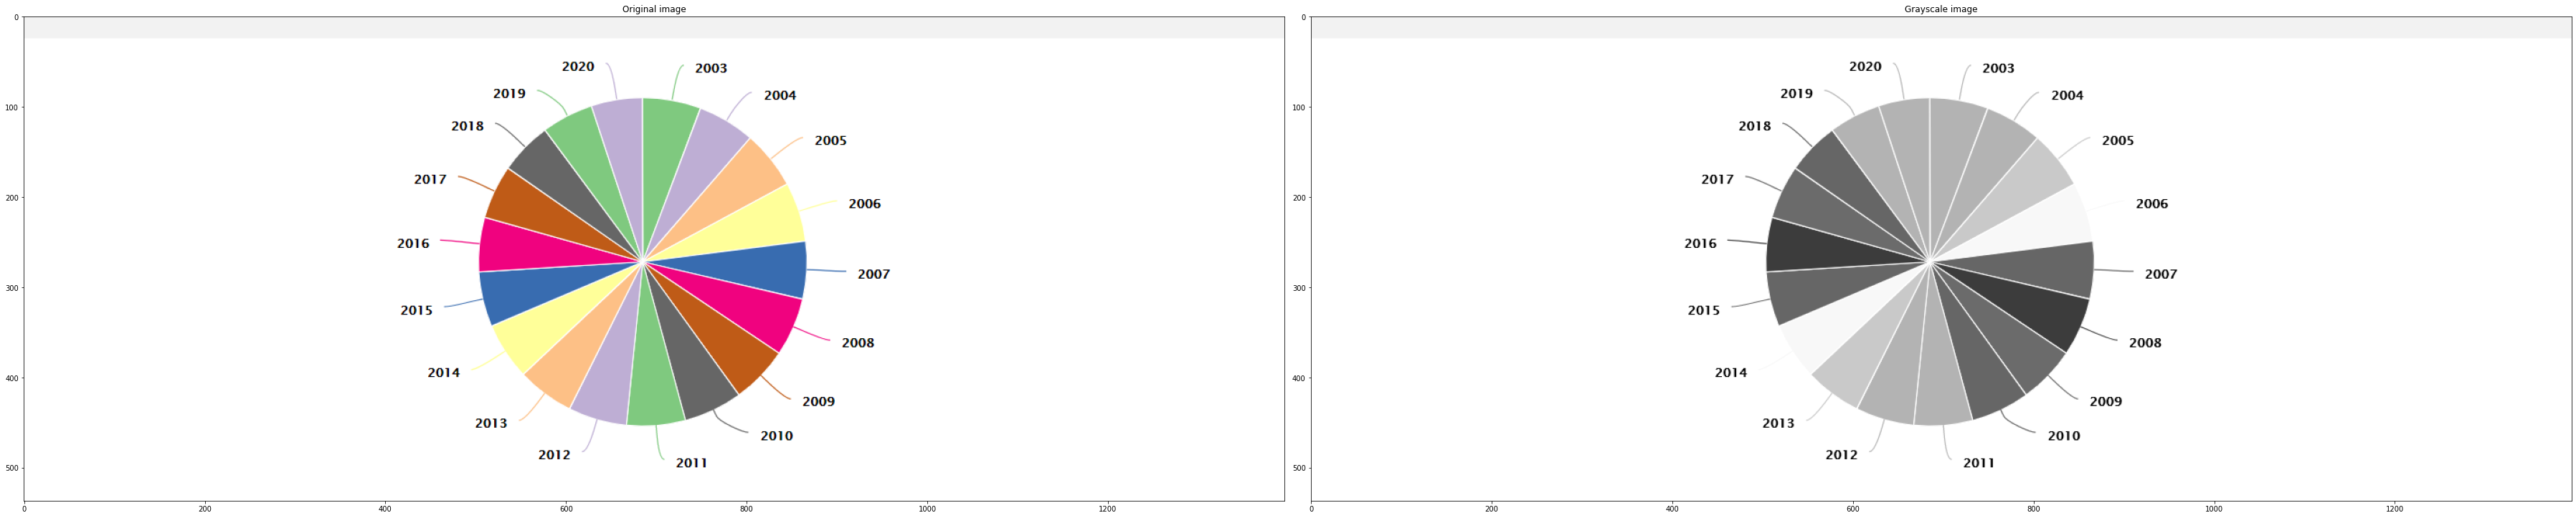

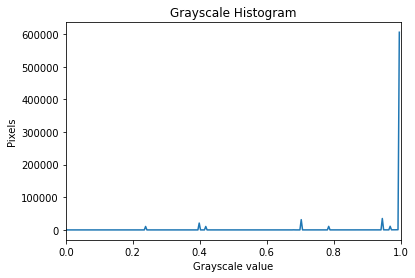

Entropie associé à l'image images/Capture_quanti_false.png : 1.4969659383916338


'Modèle de Mackinlay non-respecté.'

In [88]:
entropy_study('images/Capture_nominal.png')
entropy_study('images/Capture_quantitative.png')
entropy_study('images/Capture_quanti_false.png')

Comme on peut le voir l'entropie est faible pour des représentation pour lesquelles les recommandations de Mackinlay sont respecté.

On peut donc penser légitimement qu'il peut y avoir corrélation entre les deux.

### Remarque : 

Pour la représentation de la variable nominale on peut observer que dans mon cas elle est très élévé, on peut donc se demander pour quelles raisons.
Je pense que c'est parce que la couleur rouge deviens foncé en nuances de gris et en plus de cela il n'y a que deux "colonnes" ce qui peut surcharger le graphique de noir.